In [3]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [13]:
IBMQ.load_accounts()

c:\program files (x86)\microsoft visual studio\shared\anaconda3_64\lib\site-packages\qiskit\providers\ibmq\utils\deprecation.py:53: DeprecationWarning: IBMQ.load_accounts() is being deprecated. Please use IBM Q Experience v2 credentials and IBMQ.load_account() (note the singular form) instead. You can find the instructions to make the updates here: 
https://github.com/Qiskit/qiskit-ibmq-provider#updating-to-the-new-ibm-q-experience
  DeprecationWarning)
c:\program files (x86)\microsoft visual studio\shared\anaconda3_64\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:483: DeprecationWarning: Calling IBMQ.load_accounts() with v2 credentials. This is provided for backwards compatibility and may lead to unexpected behaviour when mixing v1 and v2 account credentials.
  'v1 and v2 account credentials.', DeprecationWarning)


$$
QFT: \vert j_1 j_2 j_3 ... j_n \rangle \rightarrow \frac{1}{2^{n/2}} (\vert 0 \rangle + e^{2 \pi i (0.j_n)}\vert 1 \rangle) (\vert 0 \rangle + e^{2 \pi i (0.j_{n-1} j_n)}\vert 1 \rangle) (\vert 0 \rangle + e^{2 \pi i (0.j_{n-2} j_{n-1} j_n)}\vert 1 \rangle) .... (\vert 0 \rangle + e^{2 \pi i (0.j_1 j_2 ... j_n)}\vert 1 \rangle) 
$$

In [15]:
def qft(circuit, reg, n):
    circuit.h(reg)
    circuit.barrier()
    for i in range(n):
        k = n-1-i
        for j in range(k):
            circuit.cu1(math.pi/(2 ** (j+1)) , reg[i+j+1], reg[i])
    for i in range(n-1):
        circuit.swap(reg[i],reg[i+1])

In [16]:
qreg = QuantumRegister(3)
creg = ClassicalRegister(3)
circ = QuantumCircuit(qreg,creg)
circ.draw(output = 'mpl')

circ.x(qreg[0])
circ.x(qreg[2])
circ.barrier()
qft(circ, qreg, 3)



circ.measure(qreg, creg)

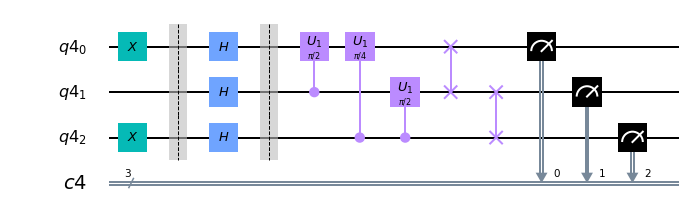

In [17]:
circ.draw(output = 'mpl')

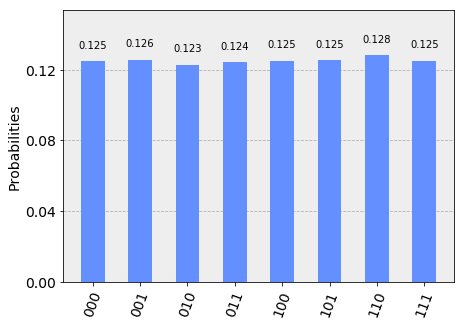

In [18]:
backend = Aer.get_backend("qasm_simulator")
simulate = execute(circ, backend=backend, shots=99999).result()
results = simulate.get_counts()

plot_histogram(results)

c:\program files (x86)\microsoft visual studio\shared\anaconda3_64\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


Job Status: job has successfully run


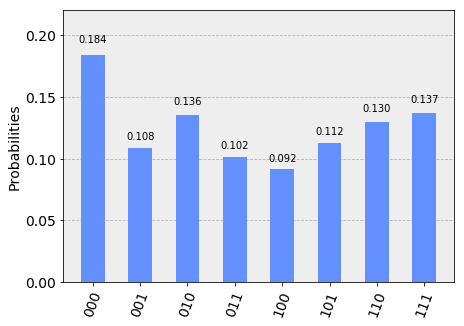

In [19]:
# Use the IBM Quantum Experience
backend = least_busy(IBMQ.backends(simulator=False))
shots = 1024
job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

results = job_exp.result()
plot_histogram(results.get_counts())